## Run Inference

Use this notebook to run the "inference" section of an existing model, located in the `models` directory, so you can evaluate the model many times without having to retrain them.

First, set the path to the model you want to train:

In [ ]:
path = "models/cats_dogs_4.keras"

Next, simply run the following cells:

In [95]:
import keras
import matplotlib.pyplot as plt
import random    # To randomly pick up images

model = keras.models.load_model(path)
image_size = (180, 180)

def run_inference(img_path, model):
    img = keras.utils.load_img(img_path, target_size=image_size)
    plt.imshow(img)

    img_array = keras.utils.img_to_array(img)
    img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = float(keras.ops.sigmoid(predictions[0][0]))
    print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

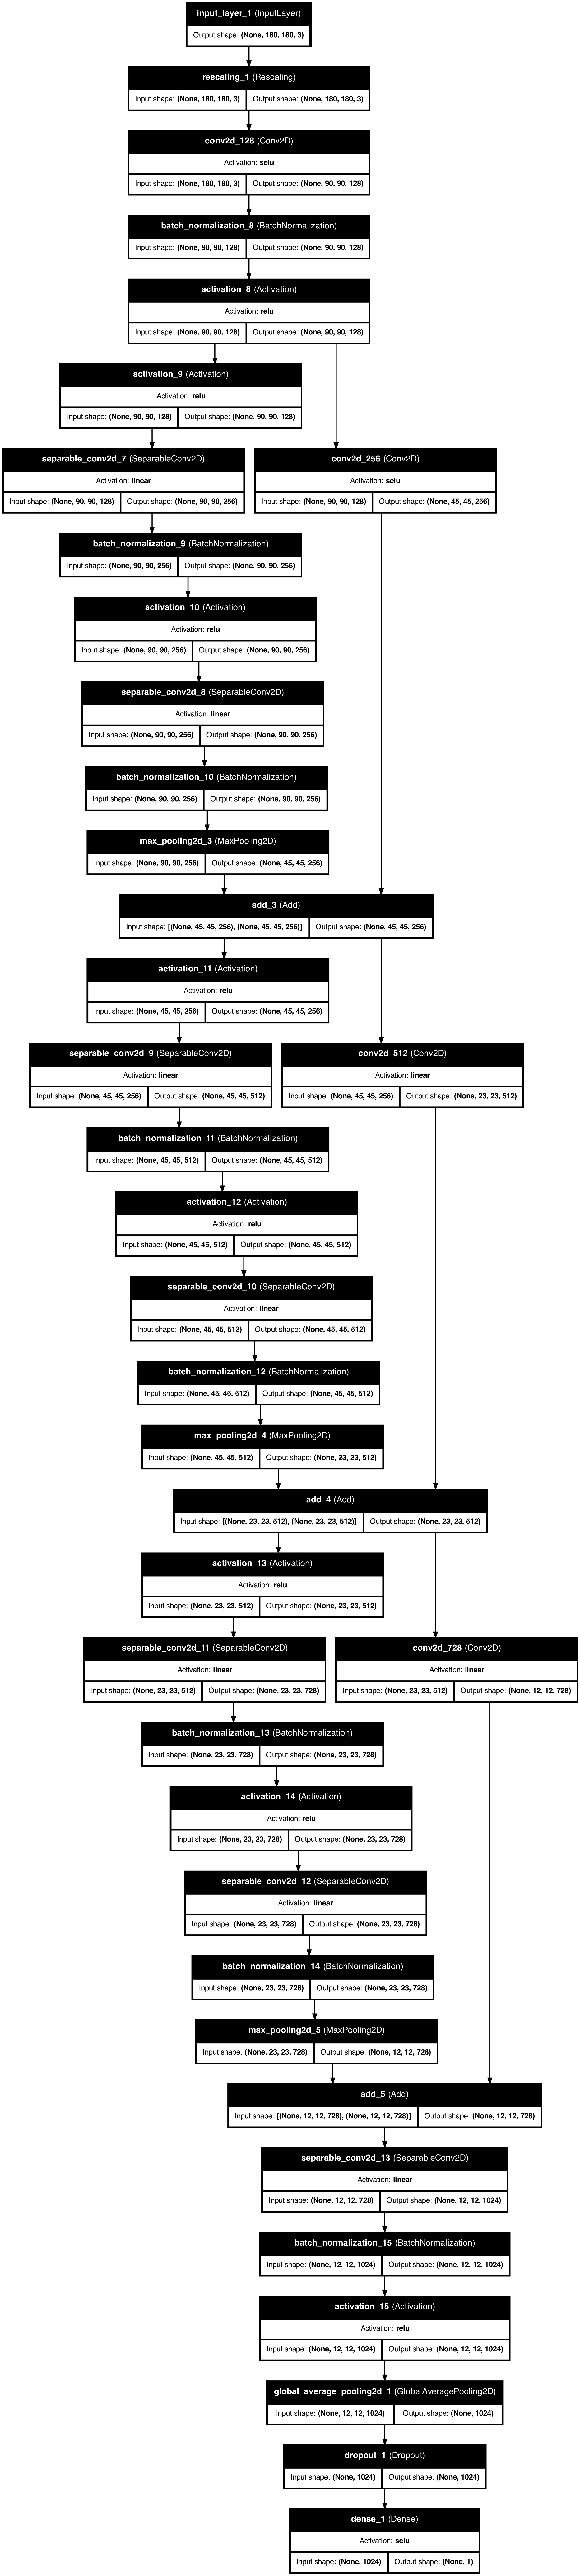

In [96]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This image is 85.28% cat and 14.72% dog.


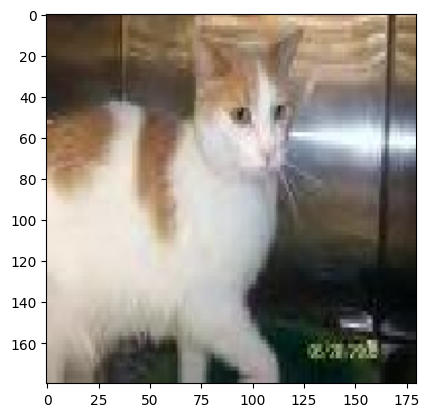

In [105]:
while True:
    num = random.randint(0, 12499)
    try:
        run_inference(f"PetImages/Cat/{num}.jpg", model)
    except FileNotFoundError:
        continue
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This image is 29.02% cat and 70.98% dog.


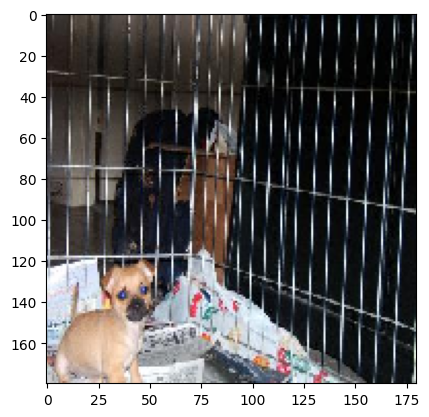

In [107]:
while True:
    num = random.randint(0, 12499)
    try:
        run_inference(f"PetImages/Dog/{num}.jpg", model)
    except FileNotFoundError:
        continue
    break